# Midterm Project Messy Work
*Matthew Ueckermann*


## Importing the data

Can import one year as:

In [1]:
import pandas as pd
import numpy as np
import time

df_2019 = pd.read_csv('https://enviro.epa.gov/enviro/efservice/MV_TRI_BASIC_DOWNLOAD/year/=/2019/fname/TRI_2019_US.csv/CSV',low_memory=False)
# to scrape later, do in for loop. Add time delay for politenes

print("done")

done


In [2]:
df_2019.head()

,1. YEAR,2. TRIFD,3. FRS ID,4. FACILITY NAME,5. STREET ADDRESS,6. CITY,7. COUNTY,8. ST,9. ZIP,10. BIA,...,108. 8.3 - ENERGY RECOVER OF,109. 8.4 - RECYCLING ON SITE,110. 8.5 - RECYCLING OFF SIT,111. 8.6 - TREATMENT ON SITE,112. 8.7 - TREATMENT OFF SITE,113. PRODUCTION WSTE (8.1-8.7),114. 8.8 - ONE-TIME RELEASE,115. PROD_RATIO_OR_ ACTIVITY,116. 8.9 - PRODUCTION RATIO,Unnamed: 116
0,2019,77015FRMNT2239H,110000460965,GB BIOSCIENCES LLC,2239 HADEN RD,HOUSTON,HARRIS,TX,77015,NaN,...,0.0,0.0,0.0,11.0,0.0,214.10,NaN,PRODUCTION,0.00,NaN
1,2019,2974WCMSTL6371C,110040511407,CM STEEL INC,6371 CAMPBELL ROAD,YORK,YORK,SC,29745,NaN,...,0.0,0.0,30200.0,0.0,0.0,30225.40,NaN,PRODUCTION,1.20,NaN
2,2019,77015FRMNT2239H,110000460965,GB BIOSCIENCES LLC,2239 HADEN RD,HOUSTON,HARRIS,TX,77015,NaN,...,0.0,0.0,0.0,0.0,0.0,13395.01,NaN,PRODUCTION,0.00,NaN
3,2019,5535WTCHTC1PREC,110031294882,TECH-ETCH INC,1 PRECISION DR,LITCHFIELD,MEEKER,MN,55355,NaN,...,0.0,0.0,0.0,0.0,0.0,0.00,NaN,NaN,NaN,NaN
4,2019,51031WLLSD11911,110000414034,WELLS ENTERPRISES INC SOUTH ICE CREAM PLANT,1191 18TH ST SW,LE MARS,PLYMOUTH,IA,51031,NaN,...,0.0,0.0,0.0,156541.0,0.0,156541.00,NaN,PRODUCTION,0.97,NaN


In [3]:
# Want to select/keep only the data that we care about:
#df_2019_trimmed = df_2019[["1. YEAR","2. TRIFD","8. ST","15. PARENT CO NAME","20. INDUSTRY SECTOR","34. CHEMICAL","38. CLEAN AIR ACT CHEMICAL","39. CLASSIFICATION","40. METAL","42. CARCINOGEN","45. 5.1 - FUGITIVE AIR","46. 5.2 - STACK AIR","47. 5.3 - WATER","51. 5.5.1 - LANDFILLS","59. ON-SITE RELEASE TOTAL","82. OFF-SITE RELEASE TOTAL","88. OFF-SITE RECYCLED TOTAL","101. TOTAL RELEASES","113. PRODUCTION WSTE (8.1-8.7)","114. 8.8 - ONE-TIME RELEASE","115. PROD_RATIO_OR_ ACTIVITY","116. 8.9 - PRODUCTION RATIO"]]

df_2019_trimmed = df_2019[["1. YEAR","2. TRIFD","8. ST","15. PARENT CO NAME","20. INDUSTRY SECTOR","34. CHEMICAL","39. CLASSIFICATION","42. CARCINOGEN","45. 5.1 - FUGITIVE AIR","59. ON-SITE RELEASE TOTAL","82. OFF-SITE RELEASE TOTAL","101. TOTAL RELEASES","116. 8.9 - PRODUCTION RATIO"]]
# this probably covers more than I'll actually use, but I think the rest of the columns are too much for me....

del df_2019

In [4]:
df_2019_trimmed.head()

,1. YEAR,2. TRIFD,8. ST,15. PARENT CO NAME,20. INDUSTRY SECTOR,34. CHEMICAL,39. CLASSIFICATION,42. CARCINOGEN,45. 5.1 - FUGITIVE AIR,59. ON-SITE RELEASE TOTAL,82. OFF-SITE RELEASE TOTAL,101. TOTAL RELEASES,116. 8.9 - PRODUCTION RATIO
0,2019,77015FRMNT2239H,TX,SYNGENTA CORP,Chemicals,Hydrogen cyanide,TRI,NO,0.0,0.00,203.10,203.10,0.00
1,2019,2974WCMSTL6371C,SC,NaN,Fabricated Metals,Nickel,TRI,YES,25.4,25.40,0.00,25.40,1.20
2,2019,77015FRMNT2239H,TX,SYNGENTA CORP,Chemicals,Vanadium compounds,TRI,NO,1.0,264.57,13130.44,13395.01,0.00
3,2019,5535WTCHTC1PREC,MN,TECH ETCH INC,Fabricated Metals,Chlorine,TRI,NO,0.0,0.00,0.00,0.00,NaN
4,2019,51031WLLSD11911,IA,WELLS ENTERPRISES INC,Food,Nitric acid,TRI,NO,0.0,0.00,0.00,0.00,0.97


In [5]:
## time to scrape!
df = df_2019_trimmed

for x in range(1987,2019):
    address = 'https://enviro.epa.gov/enviro/efservice/MV_TRI_BASIC_DOWNLOAD/year/=/'+str(x)+'/fname/TRI_'+str(x)+'_US.csv/CSV'
    df_new = pd.read_csv(address,low_memory=False)
    
    df_new_trimmed = df_new[["1. YEAR","2. TRIFD","8. ST","15. PARENT CO NAME","20. INDUSTRY SECTOR","34. CHEMICAL","39. CLASSIFICATION","42. CARCINOGEN","45. 5.1 - FUGITIVE AIR","46. 5.2 - STACK AIR","47. 5.3 - WATER","59. ON-SITE RELEASE TOTAL","82. OFF-SITE RELEASE TOTAL","101. TOTAL RELEASES","116. 8.9 - PRODUCTION RATIO"]]

    df = df.append(df_new_trimmed, ignore_index=True)
    del df_new
    time.sleep(2)

In [6]:
df.tail(1) # seems like we have everything imported/scraped...

,1. YEAR,2. TRIFD,8. ST,15. PARENT CO NAME,20. INDUSTRY SECTOR,34. CHEMICAL,39. CLASSIFICATION,42. CARCINOGEN,45. 5.1 - FUGITIVE AIR,59. ON-SITE RELEASE TOTAL,82. OFF-SITE RELEASE TOTAL,101. TOTAL RELEASES,116. 8.9 - PRODUCTION RATIO,46. 5.2 - STACK AIR,47. 5.3 - WATER
2820093,2018,37066STVGL1499S,TN,US TENNESSEE VALLEY AUTHORITY,Electric Utilities,Copper compounds,TRI,NO,2.0,54143.0,0.0,54143.0,0.98,140.0,2900.0


## Lets start understanding the data that we have

Want to see general structure of the TRI, see if anything interesting pops up

In [7]:
df["34. CHEMICAL"].value_counts()

Toluene                        100742
Zinc compounds                  97595
Lead                            96018
Xylene (mixed isomers)          94743
Ammonia                         89116
                                ...  
alpha-Hexachlorocyclohexane         1
C.I. Direct Brown 95                1
Methyleugenol                       1
Fenoxaprop-ethyl                    1
p-Chlorophenyl isocyanate           1
Name: 34. CHEMICAL, Length: 630, dtype: int64

In [8]:
df["15. PARENT CO NAME"].value_counts()

KOCH INDUSTRIES INC         29057
MARATHON PETROLEUM CORP     22320
BERKSHIRE HATHAWAY INC      21509
CLEAN HARBORS INC           21062
EXXON MOBIL CORP            17558
                            ...  
AVTRON MANUFACTURING INC        1
LOROA CORP                      1
IDX CORP                        1
ROGERS FOAM CORP                1
COCA-COLA EXPORT CORP           1
Name: 15. PARENT CO NAME, Length: 13779, dtype: int64

In [9]:
df["8. ST"].value_counts()

TX    252763
OH    195849
CA    156309
IL    151368
PA    147183
IN    121460
MI    115954
WI     96368
NC     90790
LA     86373
GA     83156
NY     81838
TN     75586
AL     71531
MO     69280
NJ     68791
SC     67456
KY     63910
FL     59112
VA     54112
MN     51301
IA     51067
MA     50721
AR     47264
MS     38862
OK     38765
KS     37435
WA     37000
CT     34510
OR     29402
WV     29129
AZ     27060
UT     24432
MD     23214
CO     23080
NE     22636
PR     16272
NV     12893
ME     12861
RI     12348
NH     12165
ID      9828
NM      9358
DE      9244
MT      8752
WY      8263
ND      7952
SD      7687
AK      5258
HI      5047
VT      3642
VI      1495
GU       846
MP       618
DC       403
AS        95
Name: 8. ST, dtype: int64

In [10]:
df["2. TRIFD"].value_counts()

90749RCPRD1801E    4018
43920VNRLL1250S    3932
71730NVRNM309AM    3879
77643WSTMNHWY73    3715
77541THDWCBUILD    3577
                   ... 
33445HRDRV2350S       1
01833BMNGNCARLE       1
49126CMSTC4125P       1
95134SDLNC80ROS       1
43302TDCDV1332F       1
Name: 2. TRIFD, Length: 61113, dtype: int64

In [11]:
# Group by values more interesting though...
df.groupby(["34. CHEMICAL","1. YEAR"])["101. TOTAL RELEASES"].sum()

34. CHEMICAL                                    1. YEAR
1,1,1,2-Tetrachloro-2-fluoroethane (HCFC-121a)  1997       19701.00
                                                1998       23276.00
                                                2000       27200.00
                                                2005           0.00
                                                2006           8.23
                                                             ...   
trans-1,4-Dichloro-2-butene                     2015           1.84
                                                2016          16.54
                                                2017          52.00
                                                2018          23.00
                                                2019           9.00
Name: 101. TOTAL RELEASES, Length: 14949, dtype: float64

### Some very general trends

<AxesSubplot:xlabel='1. YEAR'>

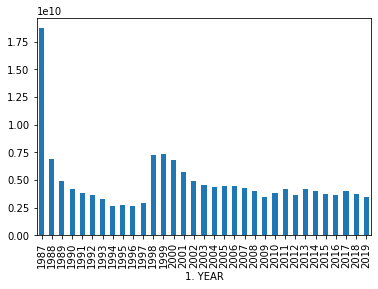

In [12]:
# Lets just look at total chemical releases by year. See if there's anything there
import seaborn as sns
import matplotlib.pyplot as plt

sumEmm_year = df.groupby(["1. YEAR"])["101. TOTAL RELEASES"].sum()

sumEmm_year.plot(kind='bar')
#not super exciting, might be able to attribute first decrease to the creation of the TRI, but probs not more

<AxesSubplot:xlabel='1. YEAR'>

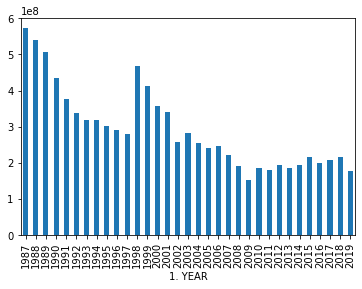

In [13]:
# Continue, but lets look at specific bad chemcials, starting with carcinogens

sumCarcinogens_year = df[df["42. CARCINOGEN"]=="YES"].groupby(["1. YEAR"])["101. TOTAL RELEASES"].sum()
sumCarcinogens_year.plot(kind='bar')

<AxesSubplot:xlabel='1. YEAR'>

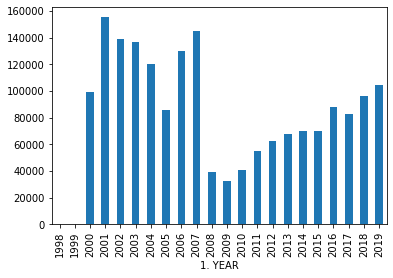

In [14]:
# Dioxins

sumDiox_year = df[df["39. CLASSIFICATION"]=="Dioxin"].groupby(["1. YEAR"])["101. TOTAL RELEASES"].sum()
sumDiox_year.plot(kind='bar')

<AxesSubplot:xlabel='1. YEAR'>

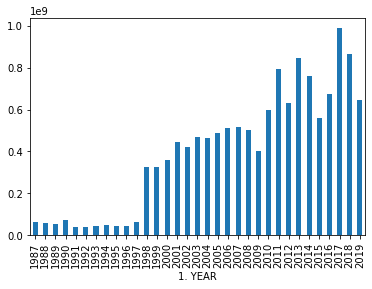

In [15]:
# PBTs

sumPBT_year = df[df["39. CLASSIFICATION"]=="PBT"].groupby(["1. YEAR"])["101. TOTAL RELEASES"].sum()
sumPBT_year.plot(kind='bar')

<AxesSubplot:xlabel='1. YEAR'>

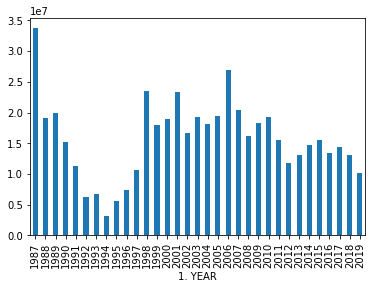

In [16]:
# So obviously, PBT/dioxin usage not decreasing... Is this due to addition of new compounds, or just greater use?

# Lets take some example PBTs

# lead
sumLead_year = df[df["34. CHEMICAL"]=="Lead"].groupby(["1. YEAR"])["101. TOTAL RELEASES"].sum()
sumLead_year.plot(kind='bar')

# looks like they added more industries in 199 time, a well as more PBTs..

In [17]:
df["20. INDUSTRY SECTOR"].value_counts()
#  Wow this is a lot. Really only had chemicals/petroleum in my mind

Chemicals                            702194
Fabricated Metals                    301374
Primary Metals                       231126
Transportation Equipment             173953
Petroleum                            157776
Electric Utilities                   125001
Food                                 119210
Plastics and Rubber                  106415
Machinery                            104414
Nonmetallic Mineral Product          101383
Paper                                 96064
Petroleum Bulk Terminals              92945
Computers and Electronic Products     82813
Chemical Wholesalers                  61762
Electrical Equipment                  57964
Wood Products                         57774
Hazardous Waste                       57367
Other                                 40268
Furniture                             38063
Miscellaneous Manufacturing           35646
Textiles                              17507
Printing                              16180
Metal Mining                    

<AxesSubplot:xlabel='20. INDUSTRY SECTOR'>

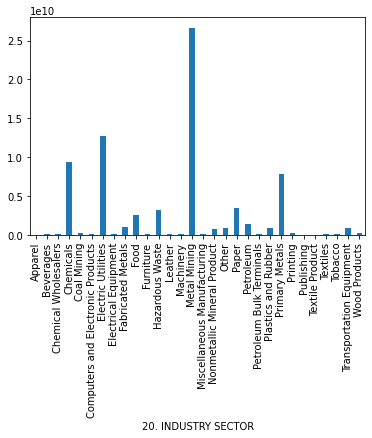

In [18]:
#Lets look at the magnitude...
sumChem_industry = df[df["1. YEAR"]>2001].groupby(["20. INDUSTRY SECTOR"])["101. TOTAL RELEASES"].sum()
sumChem_industry.plot(kind="bar")

Text(0, 0.5, 'Total chemicals emmited (Mlb)')

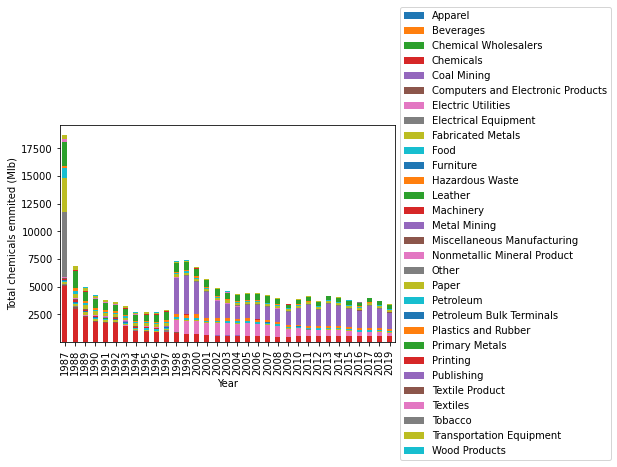

In [62]:
sumChem_byIndustry_year = df.groupby(["1. YEAR","20. INDUSTRY SECTOR"])["101. TOTAL RELEASES"].sum()*10**-6
sumChem_byIndustry_year.unstack(level=1).plot.bar(stacked=True).legend(loc='center left',bbox_to_anchor=(1.0, 0.5));
plt.xlabel("Year")
plt.ylabel("Total chemicals emmited (Mlb)")
plt.show()

# Pretty chart, but think I will use to justify zeroing on jsut the chemicals industry...

### Zeroing in on the Chemical Industry

Seems like an interesting case study of the data. Also what I am personally the most interested in....



In [20]:
df_chemical = df[df["20. INDUSTRY SECTOR"]=="Chemicals"]
df_chemical

,1. YEAR,2. TRIFD,8. ST,15. PARENT CO NAME,20. INDUSTRY SECTOR,34. CHEMICAL,39. CLASSIFICATION,42. CARCINOGEN,45. 5.1 - FUGITIVE AIR,59. ON-SITE RELEASE TOTAL,82. OFF-SITE RELEASE TOTAL,101. TOTAL RELEASES,116. 8.9 - PRODUCTION RATIO,46. 5.2 - STACK AIR,47. 5.3 - WATER
0,2019,77015FRMNT2239H,TX,SYNGENTA CORP,Chemicals,Hydrogen cyanide,TRI,NO,0.00000,0.00000,203.100000,203.100000,0.00,NaN,NaN
2,2019,77015FRMNT2239H,TX,SYNGENTA CORP,Chemicals,Vanadium compounds,TRI,NO,1.00000,264.57000,13130.440000,13395.010000,0.00,NaN,NaN
5,2019,66542FLXLN6000S,KS,NaN,Chemicals,Toluene,TRI,NO,23519.00000,87107.00000,0.000000,87107.000000,0.95,NaN,NaN
7,2019,77015FRMNT2239H,TX,SYNGENTA CORP,Chemicals,Dioxin and dioxin-like compounds,Dioxin,YES,0.52882,5.41933,278.876856,284.296186,1.22,NaN,NaN
8,2019,77015FRMNT2239H,TX,SYNGENTA CORP,Chemicals,Hexachlorobenzene,PBT,YES,0.24000,322.24900,7222.748230,7544.997230,1.22,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2820086,2018,77571LPRTC2400M,TX,OCCIDENTAL CHEMICAL HOLDING CORP,Chemicals,Chloroform,TRI,YES,731.00000,1350.10000,0.210000,1350.310000,0.99,615.0,4.1
2820087,2018,77571LPRTC2400M,TX,OCCIDENTAL CHEMICAL HOLDING CORP,Chemicals,Lead compounds,PBT,NO,0.00000,62.00000,0.070000,62.070000,1.02,9.0,53.0
2820088,2018,60554FNSHSWHEEL,IL,ENGINEERED CUSTOM COATINGS LLC,Chemicals,sec-Butyl alcohol,TRI,NO,673.00000,1346.00000,0.000000,1346.000000,0.08,673.0,0.0
2820089,2018,40361MLLNCHIGHW,KY,AVANTOR PERFORMANCE MATERIALS INC,Chemicals,Methyl isobutyl ketone,TRI,YES,0.00000,0.00000,0.000000,0.000000,2.19,0.0,0.0


In [21]:
JM_df = df_chemical[df_chemical["15. PARENT CO NAME"]=="JOHNSON MATTHEY INC"] # my future employeer, might keep around if interested later...

<AxesSubplot:xlabel='1. YEAR'>

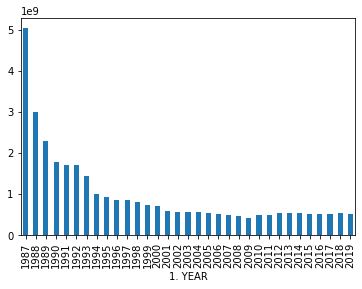

In [22]:
# All chemicals
df_chemical.groupby(["1. YEAR"])["101. TOTAL RELEASES"].sum().plot(kind='bar') # hey you can do this in one line
### OOOOh a nice decrease with the introduction of the TRI, no longer confounded with the introduction of other industries

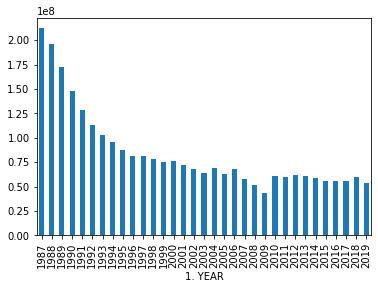

In [23]:
# Carinogens
# start only looking at chemical...
sumDioxChem_year = df_chemical[df_chemical["42. CARCINOGEN"]=="YES"].groupby(["1. YEAR"])["101. TOTAL RELEASES"].sum().plot(kind='bar') 

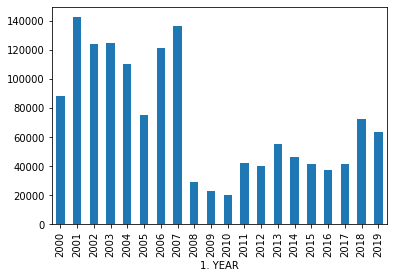

In [24]:
# Dioxins
sumDioxChem_year = df_chemical[df_chemical["39. CLASSIFICATION"]=="Dioxin"].groupby(["1. YEAR"])["101. TOTAL RELEASES"].sum().plot(kind='bar') # Methodology change to more group contribution in 2008
# counfounded by normalizations - take into account

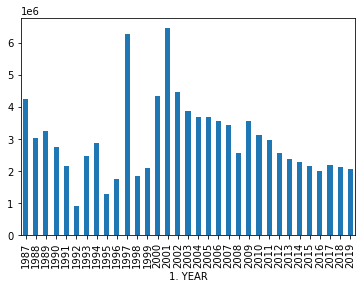

In [25]:
# PBT
sumDioxChem_year = df_chemical[df_chemical["39. CLASSIFICATION"]=="PBT"].groupby(["1. YEAR"])["101. TOTAL RELEASES"].sum().plot(kind='bar') # Methodology change to more group contribution in 2008
# confounded by additions - take into account

### Anaylsis ideas

Glad I restricted to the chemical industry
 - Look into controlling for production increase
 - Start to look at specific sites/companies
     - Case study notable chemicals (PFAS?)
 - Trends in emission types out of what we have
 - Start making own stats
     - Yearly decrease in specific chemical emitted
         - compare with production increase ratio
     - Shift in chemicals compositions within plants
  - Look at state trends


## Do plants get better at controlling emissions?

I think this might be too difficult for me, will shelf unless I get a better idea...

In [26]:
year_location = df_chemical.groupby(["1. YEAR","2. TRIFD"])["101. TOTAL RELEASES"].sum()

year_location

#df_chemical.groupby(["1. YEAR","2. TRIFD"])["116. 8.9 - PRODUCTION RATIO"].sum()

#df_chemical.groupby(["2. TRIFD"])["101. TOTAL RELEASES"].count()

1. YEAR  2. TRIFD       
1987     00613RSTNDROUTE          0.00
         00617BBTTCROADN     305421.00
         00617BRSTLSTATE     970700.00
         00617MRCKSSTATE    1285340.00
         00617PFZRPHIGHW     148450.00
                               ...    
2019     99337KRLYGROUTE       6558.45
         99352DVNCD2101H      81715.00
         9950WNRCLS298CM         10.00
         9973WBRDMD2555S          0.10
         9973WHLLBR285SP          2.30
Name: 101. TOTAL RELEASES, Length: 133468, dtype: float64

In [ ]:
df_chemical.groupby(["1. YEAR","2. TRIFD"])["101. TOTAL RELEASES"].describe()

In [ ]:
#Would want to control by increase in production, ratio is given in last column
#https://www.epa.gov/sites/production/files/2016-05/documents/p2_factsheet_may_2016_final.pdf how to think
df_chemical["116. 8.9 - PRODUCTION RATIO"]

df_chem_prod = df_chemical[df_chemical["116. 8.9 - PRODUCTION RATIO"]!=0] # Can now control by increase in production by facility

In [186]:
specificSite_Chem = df_chem_prod[(df_chem_prod["2. TRIFD"]=="77015FRMNT2239H") & (df_chemical["34. CHEMICAL"]=="Hydrogen cyanide")]
#specificSite_Chem["Normalized Production"] - specificSite_Chem["101. TOTAL RELEASES"] Does not compare between years
specificSite_Chem # Can try to determine a statistic with this

c:\users\matth\desktop\cisc367\cisc367_dir\venv\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,1. YEAR,2. TRIFD,8. ST,15. PARENT CO NAME,20. INDUSTRY SECTOR,34. CHEMICAL,39. CLASSIFICATION,42. CARCINOGEN,45. 5.1 - FUGITIVE AIR,59. ON-SITE RELEASE TOTAL,82. OFF-SITE RELEASE TOTAL,101. TOTAL RELEASES,116. 8.9 - PRODUCTION RATIO,46. 5.2 - STACK AIR,47. 5.3 - WATER,Normalized Production,Normalized Difference
78813,1987,77015FRMNT2239H,TX,SYNGENTA CORP,Chemicals,Hydrogen cyanide,TRI,NO,70.0,650.000,8530.0,9180.000,NaN,500.0,80.000,NaN,NaN
159775,1988,77015FRMNT2239H,TX,SYNGENTA CORP,Chemicals,Hydrogen cyanide,TRI,NO,250.0,1250.000,500.0,1750.000,NaN,750.0,250.000,NaN,NaN
248316,1989,77015FRMNT2239H,TX,SYNGENTA CORP,Chemicals,Hydrogen cyanide,TRI,NO,250.0,12820.000,500.0,13320.000,NaN,12320.0,250.000,NaN,NaN
337053,1990,77015FRMNT2239H,TX,SYNGENTA CORP,Chemicals,Hydrogen cyanide,TRI,NO,116.0,963.000,667.0,1630.000,NaN,814.0,33.000,NaN,NaN
425600,1991,77015FRMNT2239H,TX,SYNGENTA CORP,Chemicals,Hydrogen cyanide,TRI,NO,114.0,733.000,79.0,812.000,0.89,619.0,0.000,912.359551,NaN
513054,1992,77015FRMNT2239H,TX,SYNGENTA CORP,Chemicals,Hydrogen cyanide,TRI,NO,150.0,1370.000,12.0,1382.000,1.05,1220.0,0.000,1316.190476,NaN
597607,1993,77015FRMNT2239H,TX,SYNGENTA CORP,Chemicals,Hydrogen cyanide,TRI,NO,139.0,173.000,9.0,182.000,0.96,34.0,0.000,189.583333,NaN
680554,1994,77015FRMNT2239H,TX,SYNGENTA CORP,Chemicals,Hydrogen cyanide,TRI,NO,143.0,178.000,0.0,178.000,0.82,35.0,0.000,217.073171,NaN
758453,1995,77015FRMNT2239H,TX,SYNGENTA CORP,Chemicals,Hydrogen cyanide,TRI,NO,0.0,0.000,0.0,0.000,NaN,0.0,0.000,NaN,NaN
836043,1996,77015FRMNT2239H,TX,SYNGENTA CORP,Chemicals,Hydrogen cyanide,TRI,NO,128.0,189.000,541.0,730.000,0.86,61.0,0.000,848.837209,NaN


In [184]:
#specificSite_Chem.reset_index() dont think this is actually needed

,index,1. YEAR,2. TRIFD,8. ST,15. PARENT CO NAME,20. INDUSTRY SECTOR,34. CHEMICAL,39. CLASSIFICATION,42. CARCINOGEN,45. 5.1 - FUGITIVE AIR,59. ON-SITE RELEASE TOTAL,82. OFF-SITE RELEASE TOTAL,101. TOTAL RELEASES,116. 8.9 - PRODUCTION RATIO,46. 5.2 - STACK AIR,47. 5.3 - WATER,Normalized Production,Normalized Difference
0,78813,1987,77015FRMNT2239H,TX,SYNGENTA CORP,Chemicals,Hydrogen cyanide,TRI,NO,70.0,650.000,8530.0,9180.000,NaN,500.0,80.000,NaN,NaN
1,159775,1988,77015FRMNT2239H,TX,SYNGENTA CORP,Chemicals,Hydrogen cyanide,TRI,NO,250.0,1250.000,500.0,1750.000,NaN,750.0,250.000,NaN,NaN
2,248316,1989,77015FRMNT2239H,TX,SYNGENTA CORP,Chemicals,Hydrogen cyanide,TRI,NO,250.0,12820.000,500.0,13320.000,NaN,12320.0,250.000,NaN,NaN
3,337053,1990,77015FRMNT2239H,TX,SYNGENTA CORP,Chemicals,Hydrogen cyanide,TRI,NO,116.0,963.000,667.0,1630.000,NaN,814.0,33.000,NaN,NaN
4,425600,1991,77015FRMNT2239H,TX,SYNGENTA CORP,Chemicals,Hydrogen cyanide,TRI,NO,114.0,733.000,79.0,812.000,0.89,619.0,0.000,912.359551,NaN
5,513054,1992,77015FRMNT2239H,TX,SYNGENTA CORP,Chemicals,Hydrogen cyanide,TRI,NO,150.0,1370.000,12.0,1382.000,1.05,1220.0,0.000,1316.190476,NaN
6,597607,1993,77015FRMNT2239H,TX,SYNGENTA CORP,Chemicals,Hydrogen cyanide,TRI,NO,139.0,173.000,9.0,182.000,0.96,34.0,0.000,189.583333,NaN
7,680554,1994,77015FRMNT2239H,TX,SYNGENTA CORP,Chemicals,Hydrogen cyanide,TRI,NO,143.0,178.000,0.0,178.000,0.82,35.0,0.000,217.073171,NaN
8,758453,1995,77015FRMNT2239H,TX,SYNGENTA CORP,Chemicals,Hydrogen cyanide,TRI,NO,0.0,0.000,0.0,0.000,NaN,0.0,0.000,NaN,NaN
9,836043,1996,77015FRMNT2239H,TX,SYNGENTA CORP,Chemicals,Hydrogen cyanide,TRI,NO,128.0,189.000,541.0,730.000,0.86,61.0,0.000,848.837209,NaN


In [190]:
norm_year_prev = specificSite_Chem["101. TOTAL RELEASES"]/specificSite_Chem["116. 8.9 - PRODUCTION RATIO"]
specificSite_Chem["Normalized Production"] = norm_year_prev
specificSite_Chem["Normalized Difference"] = np.nan
specificSite_Chem


c:\users\matth\desktop\cisc367\cisc367_dir\venv\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
c:\users\matth\desktop\cisc367\cisc367_dir\venv\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,1. YEAR,2. TRIFD,8. ST,15. PARENT CO NAME,20. INDUSTRY SECTOR,34. CHEMICAL,39. CLASSIFICATION,42. CARCINOGEN,45. 5.1 - FUGITIVE AIR,59. ON-SITE RELEASE TOTAL,82. OFF-SITE RELEASE TOTAL,101. TOTAL RELEASES,116. 8.9 - PRODUCTION RATIO,46. 5.2 - STACK AIR,47. 5.3 - WATER,Normalized Production,Normalized Difference
78813,1987,77015FRMNT2239H,TX,SYNGENTA CORP,Chemicals,Hydrogen cyanide,TRI,NO,70.0,650.000,8530.0,9180.000,NaN,500.0,80.000,NaN,NaN
159775,1988,77015FRMNT2239H,TX,SYNGENTA CORP,Chemicals,Hydrogen cyanide,TRI,NO,250.0,1250.000,500.0,1750.000,NaN,750.0,250.000,NaN,NaN
248316,1989,77015FRMNT2239H,TX,SYNGENTA CORP,Chemicals,Hydrogen cyanide,TRI,NO,250.0,12820.000,500.0,13320.000,NaN,12320.0,250.000,NaN,NaN
337053,1990,77015FRMNT2239H,TX,SYNGENTA CORP,Chemicals,Hydrogen cyanide,TRI,NO,116.0,963.000,667.0,1630.000,NaN,814.0,33.000,NaN,NaN
425600,1991,77015FRMNT2239H,TX,SYNGENTA CORP,Chemicals,Hydrogen cyanide,TRI,NO,114.0,733.000,79.0,812.000,0.89,619.0,0.000,912.359551,NaN
513054,1992,77015FRMNT2239H,TX,SYNGENTA CORP,Chemicals,Hydrogen cyanide,TRI,NO,150.0,1370.000,12.0,1382.000,1.05,1220.0,0.000,1316.190476,NaN
597607,1993,77015FRMNT2239H,TX,SYNGENTA CORP,Chemicals,Hydrogen cyanide,TRI,NO,139.0,173.000,9.0,182.000,0.96,34.0,0.000,189.583333,NaN
680554,1994,77015FRMNT2239H,TX,SYNGENTA CORP,Chemicals,Hydrogen cyanide,TRI,NO,143.0,178.000,0.0,178.000,0.82,35.0,0.000,217.073171,NaN
758453,1995,77015FRMNT2239H,TX,SYNGENTA CORP,Chemicals,Hydrogen cyanide,TRI,NO,0.0,0.000,0.0,0.000,NaN,0.0,0.000,NaN,NaN
836043,1996,77015FRMNT2239H,TX,SYNGENTA CORP,Chemicals,Hydrogen cyanide,TRI,NO,128.0,189.000,541.0,730.000,0.86,61.0,0.000,848.837209,NaN


In [199]:
specificSite_Chem.iat[5,11]
for i in range(2,32):
    specificSite_Chem.iat[i,16] = specificSite_Chem.iat[i,15]-specificSite_Chem.iat[i-1,11]

In [200]:
specificSite_Chem # Negative normalized difference - actual lb difference accounting for increase in production. Positive indicates increased greater than expected due to production increase

,1. YEAR,2. TRIFD,8. ST,15. PARENT CO NAME,20. INDUSTRY SECTOR,34. CHEMICAL,39. CLASSIFICATION,42. CARCINOGEN,45. 5.1 - FUGITIVE AIR,59. ON-SITE RELEASE TOTAL,82. OFF-SITE RELEASE TOTAL,101. TOTAL RELEASES,116. 8.9 - PRODUCTION RATIO,46. 5.2 - STACK AIR,47. 5.3 - WATER,Normalized Production,Normalized Difference
78813,1987,77015FRMNT2239H,TX,SYNGENTA CORP,Chemicals,Hydrogen cyanide,TRI,NO,70.0,650.000,8530.0,9180.000,NaN,500.0,80.000,NaN,NaN
159775,1988,77015FRMNT2239H,TX,SYNGENTA CORP,Chemicals,Hydrogen cyanide,TRI,NO,250.0,1250.000,500.0,1750.000,NaN,750.0,250.000,NaN,NaN
248316,1989,77015FRMNT2239H,TX,SYNGENTA CORP,Chemicals,Hydrogen cyanide,TRI,NO,250.0,12820.000,500.0,13320.000,NaN,12320.0,250.000,NaN,NaN
337053,1990,77015FRMNT2239H,TX,SYNGENTA CORP,Chemicals,Hydrogen cyanide,TRI,NO,116.0,963.000,667.0,1630.000,NaN,814.0,33.000,NaN,NaN
425600,1991,77015FRMNT2239H,TX,SYNGENTA CORP,Chemicals,Hydrogen cyanide,TRI,NO,114.0,733.000,79.0,812.000,0.89,619.0,0.000,912.359551,-717.640449
513054,1992,77015FRMNT2239H,TX,SYNGENTA CORP,Chemicals,Hydrogen cyanide,TRI,NO,150.0,1370.000,12.0,1382.000,1.05,1220.0,0.000,1316.190476,504.190476
597607,1993,77015FRMNT2239H,TX,SYNGENTA CORP,Chemicals,Hydrogen cyanide,TRI,NO,139.0,173.000,9.0,182.000,0.96,34.0,0.000,189.583333,-1192.416667
680554,1994,77015FRMNT2239H,TX,SYNGENTA CORP,Chemicals,Hydrogen cyanide,TRI,NO,143.0,178.000,0.0,178.000,0.82,35.0,0.000,217.073171,35.073171
758453,1995,77015FRMNT2239H,TX,SYNGENTA CORP,Chemicals,Hydrogen cyanide,TRI,NO,0.0,0.000,0.0,0.000,NaN,0.0,0.000,NaN,NaN
836043,1996,77015FRMNT2239H,TX,SYNGENTA CORP,Chemicals,Hydrogen cyanide,TRI,NO,128.0,189.000,541.0,730.000,0.86,61.0,0.000,848.837209,848.837209


In [164]:
# Should have dropped the NaN, but I like the new Normalized difference metric. Can do anaylsis on it (mean, std...) to see how it shifts
specificSite_Chem["Normalized Difference"].describe()

count      27.000000
mean       15.351577
std       682.756848
min     -1579.636232
25%      -127.400060
50%        10.043956
75%       460.982483
max      1116.985075
Name: Normalized Difference, dtype: float64

In [212]:
df_chem_prod.loc[specificSite_Chem.index,"Normalized Difference"] = specificSite_Chem["Normalized Difference"]  

c:\users\matth\desktop\cisc367\cisc367_dir\venv\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


## General process for site/chemical statistic:
Collect all years of one site and chemical
Divide total releases by production ratio, call normalized release
Subtract normalized release by actual release of previous year
Then have valid reduction indicator

For rest of dataset:

In [168]:
# Code summary
# specificSite_Chem = df_chem_prod[(df_chem_prod["2. TRIFD"]=="77015FRMNT2239H") & (df_chemical["34. CHEMICAL"]=="Hydrogen cyanide")]
# norm_year_prev = specificSite_Chem["101. TOTAL RELEASES"]/specificSite_Chem["116. 8.9 - PRODUCTION RATIO"]
# specificSite_Chem["Normalized Production"] = norm_year_prev
# specificSite_Chem["Normalized Difference"] = np.nan
# for i in range(2,32):
#    specificSite_Chem.iat[i,18] = specificSite_Chem.iat[i,17]-specificSite_Chem.iat[i-1,13]
    # I just want to say this took me forever to think through

In [169]:
df_chem_prod["Normalized Production"] = df_chem_prod["101. TOTAL RELEASES"]/df_chem_prod["116. 8.9 - PRODUCTION RATIO"] # want to normalize by first emmission?


c:\users\matth\desktop\cisc367\cisc367_dir\venv\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,1. YEAR,2. TRIFD,8. ST,15. PARENT CO NAME,20. INDUSTRY SECTOR,34. CHEMICAL,39. CLASSIFICATION,42. CARCINOGEN,45. 5.1 - FUGITIVE AIR,59. ON-SITE RELEASE TOTAL,82. OFF-SITE RELEASE TOTAL,101. TOTAL RELEASES,116. 8.9 - PRODUCTION RATIO,46. 5.2 - STACK AIR,47. 5.3 - WATER,Normalized Production
5,2019,66542FLXLN6000S,KS,NaN,Chemicals,Toluene,TRI,NO,23519.00000,87107.00000,0.000000,87107.000000,0.95,NaN,NaN,91691.578947
7,2019,77015FRMNT2239H,TX,SYNGENTA CORP,Chemicals,Dioxin and dioxin-like compounds,Dioxin,YES,0.52882,5.41933,278.876856,284.296186,1.22,NaN,NaN,233.029661
8,2019,77015FRMNT2239H,TX,SYNGENTA CORP,Chemicals,Hexachlorobenzene,PBT,YES,0.24000,322.24900,7222.748230,7544.997230,1.22,NaN,NaN,6184.423959
10,2019,77015FRMNT2239H,TX,SYNGENTA CORP,Chemicals,Chlorothalonil,TRI,YES,340.20000,4252.05000,202538.450000,206790.500000,1.22,NaN,NaN,169500.409836
11,2019,3160WCJBND2224C,GA,CJB INDUSTRIES INC,Chemicals,n-Butyl alcohol,TRI,NO,0.86000,0.86000,0.000000,0.860000,1.11,NaN,NaN,0.774775
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2820086,2018,77571LPRTC2400M,TX,OCCIDENTAL CHEMICAL HOLDING CORP,Chemicals,Chloroform,TRI,YES,731.00000,1350.10000,0.210000,1350.310000,0.99,615.0,4.1,1363.949495
2820087,2018,77571LPRTC2400M,TX,OCCIDENTAL CHEMICAL HOLDING CORP,Chemicals,Lead compounds,PBT,NO,0.00000,62.00000,0.070000,62.070000,1.02,9.0,53.0,60.852941
2820088,2018,60554FNSHSWHEEL,IL,ENGINEERED CUSTOM COATINGS LLC,Chemicals,sec-Butyl alcohol,TRI,NO,673.00000,1346.00000,0.000000,1346.000000,0.08,673.0,0.0,16825.000000
2820089,2018,40361MLLNCHIGHW,KY,AVANTOR PERFORMANCE MATERIALS INC,Chemicals,Methyl isobutyl ketone,TRI,YES,0.00000,0.00000,0.000000,0.000000,2.19,0.0,0.0,0.000000


In [178]:
df_chem_prod["Normalized Difference"] = np.nan

c:\users\matth\desktop\cisc367\cisc367_dir\venv\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [216]:
#This is probably pretty darn bad, but hey:

#for i in df_chem_prod["2. TRIFD"]:
#    for j in df_chem_prod[df_chem_prod["2. TRIFD"]==i]["34. CHEMICAL"]:
#        if(df_chem_prod[(df_chem_prod["2. TRIFD"]==i) & (df_chemical["34. CHEMICAL"]==i)].shape[0]==32):
#            specificSite_chem = df_chem_prod[(df_chem_prod["2. TRIFD"]==i) & (df_chemical["34. CHEMICAL"]==i)]
#            for i in range(2,32):
#                specificSite_Chem.iat[i,16] = specificSite_Chem.iat[i,15]-specificSite_Chem.iat[i-1,11]
#            df_chem_prod.loc[specificSite_Chem.index,"Normalized Difference"] = specificSite_Chem["Normalized Difference"]
#
# Gave over an hour to run and no dice... Oh well...

c:\users\matth\desktop\cisc367\cisc367_dir\venv\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


KeyboardInterrupt: 

In [217]:
df_chem_prod.dropna(subset=["Normalized Difference"]) # worked for the specific example...

,1. YEAR,2. TRIFD,8. ST,15. PARENT CO NAME,20. INDUSTRY SECTOR,34. CHEMICAL,39. CLASSIFICATION,42. CARCINOGEN,45. 5.1 - FUGITIVE AIR,59. ON-SITE RELEASE TOTAL,82. OFF-SITE RELEASE TOTAL,101. TOTAL RELEASES,116. 8.9 - PRODUCTION RATIO,46. 5.2 - STACK AIR,47. 5.3 - WATER,Normalized Production,Normalized Difference
425600,1991,77015FRMNT2239H,TX,SYNGENTA CORP,Chemicals,Hydrogen cyanide,TRI,NO,114.0,733.000,79.0,812.000,0.89,619.0,0.000,912.359551,-717.640449
513054,1992,77015FRMNT2239H,TX,SYNGENTA CORP,Chemicals,Hydrogen cyanide,TRI,NO,150.0,1370.000,12.0,1382.000,1.05,1220.0,0.000,1316.190476,504.190476
597607,1993,77015FRMNT2239H,TX,SYNGENTA CORP,Chemicals,Hydrogen cyanide,TRI,NO,139.0,173.000,9.0,182.000,0.96,34.0,0.000,189.583333,-1192.416667
680554,1994,77015FRMNT2239H,TX,SYNGENTA CORP,Chemicals,Hydrogen cyanide,TRI,NO,143.0,178.000,0.0,178.000,0.82,35.0,0.000,217.073171,35.073171
836043,1996,77015FRMNT2239H,TX,SYNGENTA CORP,Chemicals,Hydrogen cyanide,TRI,NO,128.0,189.000,541.0,730.000,0.86,61.0,0.000,848.837209,848.837209
911786,1997,77015FRMNT2239H,TX,SYNGENTA CORP,Chemicals,Hydrogen cyanide,TRI,NO,17.0,45.000,1937.0,1982.000,1.20,28.0,0.000,1651.666667,921.666667
987372,1998,77015FRMNT2239H,TX,SYNGENTA CORP,Chemicals,Hydrogen cyanide,TRI,NO,12.0,55.000,1676.0,1731.000,1.07,43.0,0.000,1617.757009,-364.242991
1078142,1999,77015FRMNT2239H,TX,SYNGENTA CORP,Chemicals,Hydrogen cyanide,TRI,NO,23.0,60.000,1026.0,1086.000,0.64,37.0,0.000,1696.875000,-34.125000
1165075,2000,77015FRMNT2239H,TX,SYNGENTA CORP,Chemicals,Hydrogen cyanide,TRI,NO,20.0,33.000,1443.0,1476.000,0.67,13.0,0.000,2202.985075,1116.985075
1259174,2001,77015FRMNT2239H,TX,SYNGENTA CORP,Chemicals,Hydrogen cyanide,TRI,NO,24.0,43.000,1.0,44.000,0.86,19.0,0.000,51.162791,-1424.837209


### Emission Type



<AxesSubplot:xlabel='1. YEAR'>

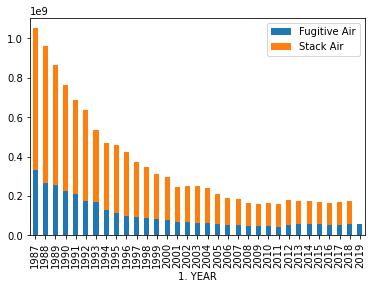

In [38]:
fugAir = df_chemical.groupby(["1. YEAR"])["45. 5.1 - FUGITIVE AIR"].sum()
stackAir = df_chemical.groupby(["1. YEAR"])["46. 5.2 - STACK AIR"].sum()
waterAir = df_chemical.groupby(["1. YEAR"])["47. 5.3 - WATER"].sum()
df_emissionType = pd.concat({"Fugitive Air":fugAir,"Stack Air":stackAir,"Water":waterAir},axis=1)
df_emissionType.plot.bar(y=['Fugitive Air', "Stack Air"], stacked=True)

<AxesSubplot:xlabel='1. YEAR'>

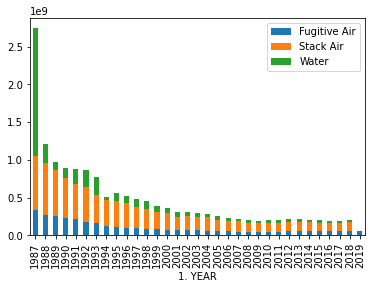

In [39]:
df_emissionType.plot.bar(y=['Fugitive Air', "Stack Air","Water"], stacked=True)

In [59]:
onsite = df_chemical.groupby(["1. YEAR"])["59. ON-SITE RELEASE TOTAL"].sum()*10**-6
offsite = df_chemical.groupby(["1. YEAR"])["82. OFF-SITE RELEASE TOTAL"].sum()*10**-6
df_emissionLocation = pd.concat({"Onsite":onsite,"Offsite":offsite},axis=1)

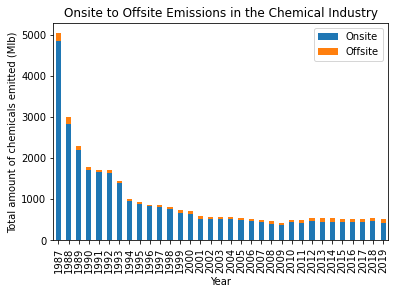

In [60]:
df_emissionLocation.plot.bar(y=['Onsite', "Offsite"], stacked=True)
plt.xlabel("Year")
plt.ylabel("Total amount of chemicals emitted (Mlb)")
plt.title("Onsite to Offsite Emissions in the Chemical Industry")
plt.show()

### State

Kinda want to create my own statistic/value to test/look for trends

In [31]:
# Difference in years might be easier here?

In [76]:
chem_year_state = df_chemical.groupby(["1. YEAR","8. ST","34. CHEMICAL"])["59. ON-SITE RELEASE TOTAL"].sum()*10**-6
df_chem_state_year = chem_year_state.reset_index() # the multi-index hurts my head
df_chem_state_year

,1. YEAR,8. ST,34. CHEMICAL,59. ON-SITE RELEASE TOTAL
0,1987,AK,"1,1,1-Trichloroethane",0.020750
1,1987,AK,Aluminum oxide (fibrous forms),0.001000
2,1987,AK,Ammonia,30.378000
3,1987,AK,Chlorine,0.000250
4,1987,AK,Copper compounds,0.001000
...,...,...,...,...
147682,2019,WY,Polycyclic aromatic compounds,0.000181
147683,2019,WY,Selenium compounds,0.013428
147684,2019,WY,"Sulfuric acid (acid aerosols including mists, ...",0.021460
147685,2019,WY,Vanadium compounds,0.031745


In [67]:
year_state = df_chemical.groupby(["1. YEAR","8. ST"])["59. ON-SITE RELEASE TOTAL"].sum()*10**-6
year_state
# For sum total, would like varaiance by chemical tho

1. YEAR  8. ST
1987     AK        30.648795
         AL       316.545581
         AR        38.696322
         AZ         0.899553
         CA        27.565102
                     ...    
2019     VT         0.000725
         WA         0.218680
         WI         0.475495
         WV         2.498984
         WY         8.298116
Name: 59. ON-SITE RELEASE TOTAL, Length: 1672, dtype: float64

In [81]:
#Would want to control by increase in production, ratio is given in last column
#https://www.epa.gov/sites/production/files/2016-05/documents/p2_factsheet_may_2016_final.pdf how to think
df_chemical["116. 8.9 - PRODUCTION RATIO"]

df_chem_prod = df_chemical[df_chemical["116. 8.9 - PRODUCTION RATIO"]!=0] # Can now control by increase in production by facility

In [95]:
specificSite_Chem = df_chem_prod[(df_chem_prod["2. TRIFD"]=="77015FRMNT2239H") & (df_chem_prod["34. CHEMICAL"]=="Hydrogen cyanide")]
specificSite_Chem["59. ON-SITE RELEASE TOTAL"].diff()


78813            NaN
159775       600.000
248316     11570.000
337053    -11857.000
425600      -230.000
513054       637.000
597607     -1197.000
680554         5.000
758453      -178.000
836043       189.000
911786      -144.000
987372        10.000
1078142        5.000
1165075      -27.000
1259174       10.000
1357822       77.700
1453951      280.700
1548144      570.931
1640257     -517.231
1732212     -136.000
1823032       73.900
1911985      -11.000
1998843      450.200
2080523     -264.200
2162623      119.000
2245064      159.000
2327904      -67.000
2411261      347.000
2494817     -128.000
2577656     -587.000
2658832      -29.600
2739773      -66.400
Name: 59. ON-SITE RELEASE TOTAL, dtype: float64